In [1]:
import matplotlib.pyplot as plt
from torchinfo import summary

from pred_report import *
from forecasting_methods import *

data = loaddata_eu()


c:\Anaconda3\envs\torch37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# reconstr = restr_ssa(dataY.reshape(-1), n_decomp=10, n_integr=2, vis=True)

In [12]:
# # Now plot the results and the forecast for the test set
# preds, conf_int = model.predict(n_periods=testY.shape[0],
#                                 return_conf_int=True)

# plotTrain = 100

# fig, axes = plt.subplots(2, 1, figsize=(12, 8))
# x_axis = np.arange(trainY.shape[0] + preds.shape[0])
# axes[0].set_title("Train samples & forecasted test samples")
# axes[0].plot(x_axis[:trainY.shape[0]], trainY, alpha=0.75)
# axes[0].scatter(x_axis[trainY.shape[0]:], preds, alpha=0.4, marker='o')
# axes[0].scatter(x_axis[trainY.shape[0]:], testY, alpha=0.4, marker='x')
# axes[0].fill_between(x_axis[-preds.shape[0]:], conf_int[:, 0], conf_int[:, 1],
#                      alpha=0.1, color='b')



# # Now add the actual samples to the model and create NEW forecasts
# model.update(testY)
# new_preds, new_conf_int = model.predict(n_periods=10, return_conf_int=True)
# new_x_axis = np.arange(data.shape[0] + 10)

# axes[1].plot(new_x_axis[:data.shape[0]], data, alpha=0.75)
# axes[1].scatter(new_x_axis[data.shape[0]:], new_preds, alpha=0.4, marker='o')
# axes[1].fill_between(new_x_axis[-new_preds.shape[0]:],
#                      new_conf_int[:, 0],
#                      new_conf_int[:, 1],
#                      alpha=0.1, color='g')
# axes[1].set_title("Added new observed values with new forecasts")
# plt.show()

In [3]:

arima_pred, real = pred_nowin_single('arima', data, vis=False)
svr_pred, real = pred_nowin_single('svr', data, vis=False)
tcn_pred, real = pred_nowin_single('tcn', data, vis=False)

sg_nowin_arima


100%|██████████| 120/120 [00:07<00:00, 16.44it/s]


performance of sg_nowin_arima
col 0: RMSE=1.99, MAPE=1.64%
col 1: RMSE=2.72, MAPE=2.36%
col 2: RMSE=3.46, MAPE=3.10%
col 3: RMSE=3.97, MAPE=3.68%
col 4: RMSE=4.36, MAPE=3.94%
col 5: RMSE=4.65, MAPE=4.23%
col 6: RMSE=4.96, MAPE=4.62%
col 7: RMSE=5.28, MAPE=5.03%
col 8: RMSE=5.57, MAPE=5.44%
col 9: RMSE=5.95, MAPE=5.89%
sg_nowin_svr


100%|██████████| 10/10 [00:00<00:00, 16.74it/s]


performance of sg_nowin_svr
col 0: RMSE=2.47, MAPE=2.22%
col 1: RMSE=3.31, MAPE=3.10%
col 2: RMSE=3.90, MAPE=3.70%
col 3: RMSE=4.27, MAPE=4.10%
col 4: RMSE=4.90, MAPE=4.80%
col 5: RMSE=5.46, MAPE=5.26%
col 6: RMSE=5.55, MAPE=5.27%
col 7: RMSE=6.24, MAPE=5.99%
col 8: RMSE=6.65, MAPE=6.39%
col 9: RMSE=7.22, MAPE=6.79%
sg_nowin_tcn
epoch 001 train_loss 0.01130908 val_loss 0.01009951
epoch 002 train_loss 0.01090451 val_loss 0.01010053
EarlyStopping counter: 1 out of 7
epoch 003 train_loss 0.01088437 val_loss 0.00912454
epoch 004 train_loss 0.01094662 val_loss 0.01011316
EarlyStopping counter: 1 out of 7
epoch 005 train_loss 0.01065562 val_loss 0.01108817
EarlyStopping counter: 2 out of 7
epoch 006 train_loss 0.01092535 val_loss 0.01022261
EarlyStopping counter: 3 out of 7
epoch 007 train_loss 0.01096769 val_loss 0.01056526
EarlyStopping counter: 4 out of 7
epoch 008 train_loss 0.01080517 val_loss 0.01007731
EarlyStopping counter: 5 out of 7
epoch 009 train_loss 0.01062590 val_loss 0.010659

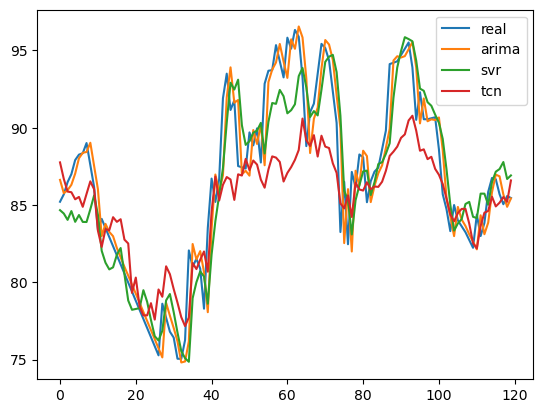

In [5]:
plt.plot(real[:,0], label='real')
plt.plot(arima_pred[:,0], label='arima')
plt.plot(svr_pred[:,0], label='svr')
plt.plot(tcn_pred[:,0], label='tcn')
plt.legend()

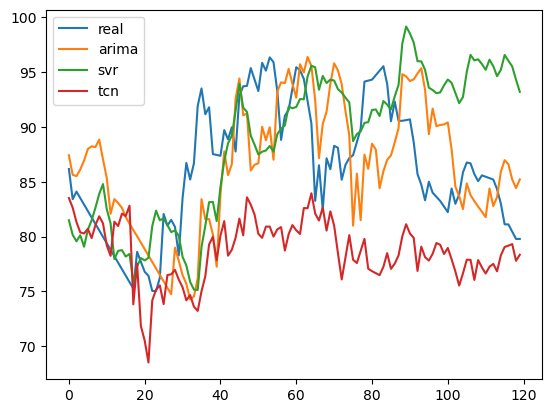

In [6]:
plt.plot(real[:,-1], label='real')
plt.plot(arima_pred[:,-1], label='arima')
plt.plot(svr_pred[:,-1], label='svr')
plt.plot(tcn_pred[:,-1], label='tcn')
plt.legend()

In [7]:
show_performance('arima', arima_pred, real, False)

performance of arima
col 0: RMSE=1.99, MAPE=1.64%
col 1: RMSE=2.72, MAPE=2.36%
col 2: RMSE=3.46, MAPE=3.10%
col 3: RMSE=3.97, MAPE=3.68%
col 4: RMSE=4.36, MAPE=3.94%
col 5: RMSE=4.65, MAPE=4.23%
col 6: RMSE=4.96, MAPE=4.62%
col 7: RMSE=5.28, MAPE=5.03%
col 8: RMSE=5.57, MAPE=5.44%
col 9: RMSE=5.95, MAPE=5.89%


In [8]:
ensemble_pred = (arima_pred + svr_pred + tcn_pred)/3
show_performance('ensemble', ensemble_pred, real, False)

performance of ensemble
col 0: RMSE=2.16, MAPE=1.93%
col 1: RMSE=2.81, MAPE=2.43%
col 2: RMSE=3.35, MAPE=2.98%
col 3: RMSE=3.78, MAPE=3.35%
col 4: RMSE=4.18, MAPE=3.60%
col 5: RMSE=4.50, MAPE=3.79%
col 6: RMSE=4.91, MAPE=4.16%
col 7: RMSE=5.17, MAPE=4.51%
col 8: RMSE=5.38, MAPE=4.74%
col 9: RMSE=5.61, MAPE=4.98%


In [9]:
ensemble_pred2 = (0.5*arima_pred + 0.3*svr_pred + 0.2*tcn_pred)
show_performance('ensemble', ensemble_pred2, real, False)

performance of ensemble
col 0: RMSE=2.01, MAPE=1.78%
col 1: RMSE=2.68, MAPE=2.32%
col 2: RMSE=3.27, MAPE=2.93%
col 3: RMSE=3.70, MAPE=3.35%
col 4: RMSE=4.08, MAPE=3.65%
col 5: RMSE=4.36, MAPE=3.79%
col 6: RMSE=4.70, MAPE=4.11%
col 7: RMSE=4.99, MAPE=4.49%
col 8: RMSE=5.23, MAPE=4.79%
col 9: RMSE=5.52, MAPE=5.08%
